# **Diabetes Prediction Notebook using Logistics Regression Approach**


## *By Paulinus Jua*

In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [92]:
!pip install opendatasets

### Import other necessary libraries

In [93]:
import pandas as pd
import pylab as pl
import numpy as np
import opendatasets as od
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [94]:
od.download("https://www.kaggle.com/uciml/pima-indians-diabetes-database/download")

Skipping, found downloaded files in "./pima-indians-diabetes-database" (use force=True to force download)


### reading the dataset using pandas

In [95]:
data = pd.read_csv("diabetes.csv")
# take a look at the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### lets define our X and Y variables

In [96]:

X = np.asarray(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' , 'Age']])
X[0:5]

y = np.asarray(data['Outcome'])
y [0:5]

array([1, 0, 1, 0, 1])

In [97]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.64,  0.85,  0.15,  0.91, -0.69,  0.2 ,  0.47,  1.43],
       [-0.84, -1.12, -0.16,  0.53, -0.69, -0.68, -0.37, -0.19],
       [ 1.23,  1.94, -0.26, -1.29, -0.69, -1.1 ,  0.6 , -0.11],
       [-0.84, -1.  , -0.16,  0.15,  0.12, -0.49, -0.92, -1.04],
       [-1.14,  0.5 , -1.5 ,  0.91,  0.77,  1.41,  5.48, -0.02]])

### Splitting out data into train and test data

In [98]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (499, 8) (499,)
Test set: (269, 8) (269,)


### Modeling our Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Using our test data

In [100]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1])

In [101]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.78, 0.22],
       [0.54, 0.46],
       [0.58, 0.42],
       [0.67, 0.33],
       [0.78, 0.22],
       [0.61, 0.39],
       [0.62, 0.38],
       [0.68, 0.32],
       [0.61, 0.39],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.29, 0.71],
       [0.49, 0.51],
       [0.28, 0.72],
       [0.79, 0.21],
       [0.68, 0.32],
       [0.41, 0.59],
       [0.53, 0.47],
       [0.69, 0.31],
       [0.3 , 0.7 ],
       [0.8 , 0.2 ],
       [0.67, 0.33],
       [0.72, 0.28],
       [0.65, 0.35],
       [0.58, 0.42],
       [0.56, 0.44],
       [0.66, 0.34],
       [0.57, 0.43],
       [0.6 , 0.4 ],
       [0.65, 0.35],
       [0.43, 0.57],
       [0.35, 0.65],
       [0.72, 0.28],
       [0.42, 0.58],
       [0.63, 0.37],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.36, 0.64],
       [0.8 , 0.2 ],
       [0.52, 0.48],
       [0.54, 0.46],
       [0.37, 0.63],
       [0.45, 0.55],
       [0.78, 0.22],
       [0.76, 0.24],
       [0.77, 0.23],
       [0.48, 0.52],
       [0.7 ,

## Evaluation of Model
### Jacard Index

In [102]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7327188940092166

### Confusion Matrix

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 52  35]
 [ 23 159]]


Confusion matrix, without normalization
[[ 52  35]
 [ 23 159]]


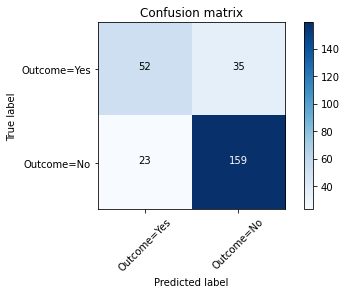

In [104]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Outcome=Yes','Outcome=No'],normalize= False,  title='Confusion matrix')

In [105]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       182
           1       0.69      0.60      0.64        87

    accuracy                           0.78       269
   macro avg       0.76      0.74      0.74       269
weighted avg       0.78      0.78      0.78       269

